# **$$Resume-Analyser$$**

---

### Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\UpdatedResumeDataSet.csv")

In [3]:
print(df["Resume"][3])

Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details 
January 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology
January 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University
Data Science Consultant 

Consultant - Deloitte USI
Skill Details 
LINEAR PROGRAMMING- Exprience - 6 months
RETAIL- Exprience - 6 months
RETAIL MARKETING- Exprience - 6 months
SCM- Exprience - 6 months
SQL- Exprience - Less than 1 year months
Deep Learning- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
R- Exprience - Less than 1 year monthsC

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_904\883051357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


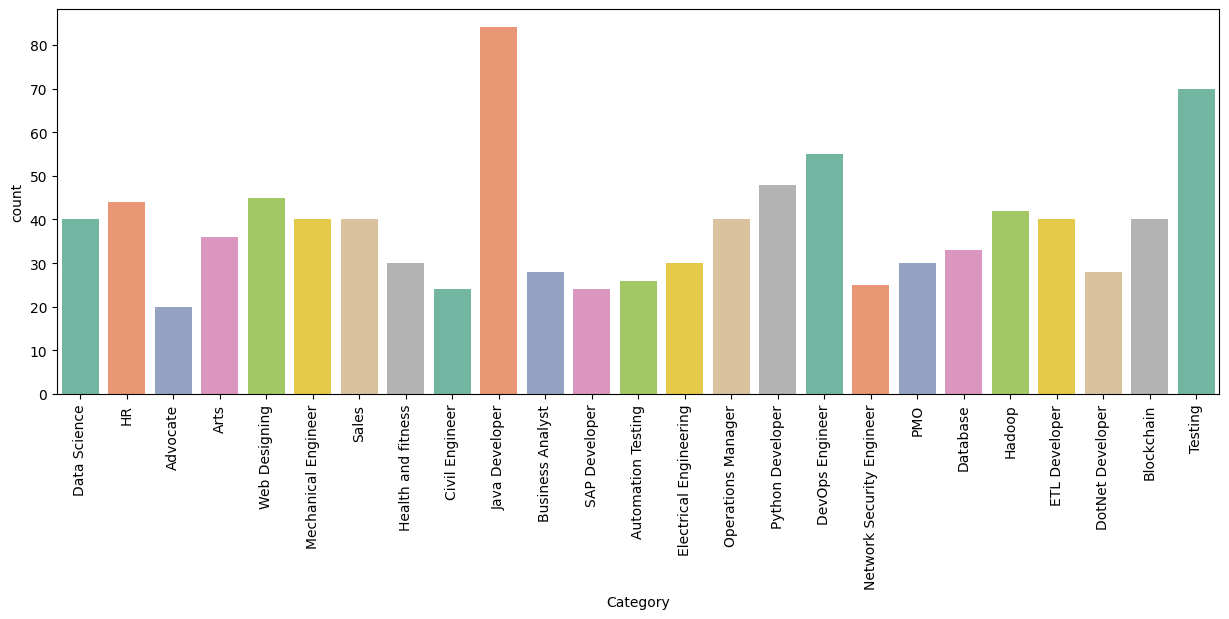

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category', palette='Set2')
plt.xticks(rotation=90);

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### Pie Chart

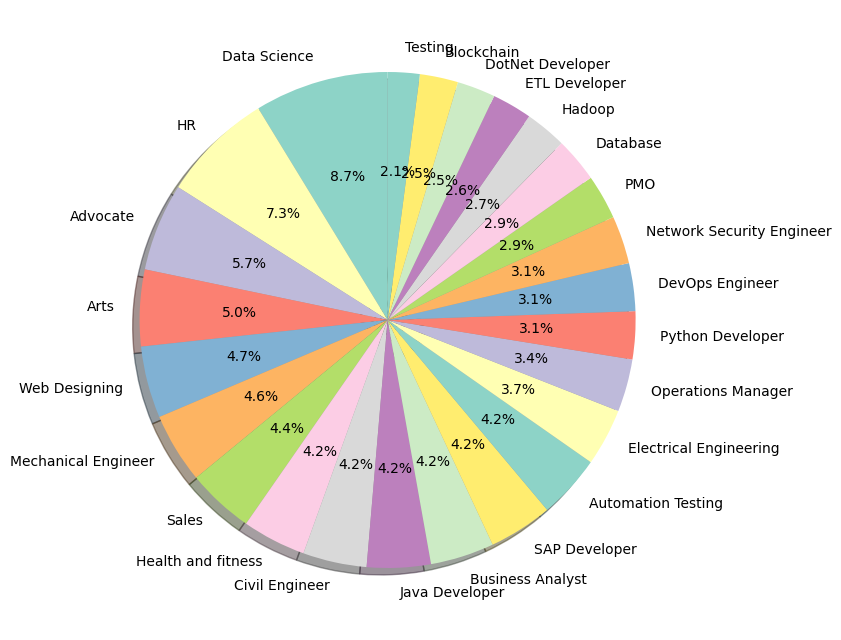

In [9]:
counts=df['Category'].value_counts()
labels=df["Category"].unique()
plt.figure(figsize=(8, 12))
colors = plt.cm.Set3.colors[:len(labels)]
plt.pie(counts, labels=labels, shadow=True, autopct='%1.1f%%', colors=colors, startangle=90)
plt.show()

### Cleaning Data
1. URLs
2. Hashtags
3. mentions
4. special letters
5. punctuation

In [10]:
import re

In [11]:
def CleanResume(txt):
    # Remove http/https and www URLs
    txt = re.sub(r'https?://\S+|www\.\S+', '', txt)
    # Remove "RT" and "cc"
    txt = re.sub(r'\bRT\b|\bcc\b', '', txt)
    # Remove hashtags (e.g., #DataScience)
    txt = re.sub(r'#\S+', '', txt)
    # Remove mentions (e.g., @username)
    txt = re.sub(r'@\S+', '', txt)
    # Remove non-ASCII characters (e.g., encoded symbols like â\x80¢)
    txt = re.sub(r'[^\x00-\x7f]', ' ', txt)
    # Remove punctuation (keep dots and spaces for readability)
    txt = re.sub(r'[!"#$%&\'()*+,-/:;<=>?@\[\\\]^_{|}~]', '', txt)
    # Normalize multiple spaces into one
    txt = re.sub(r'\s+', ' ', txt)

    return txt.strip()


In [12]:
df['Resume']=df['Resume'].apply(lambda x: CleanResume(x))

In [13]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revi

### Words into categorial Value

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [16]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
df.Category.unique()

'''['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']'''

"['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',\n       'Mechanical Engineer', 'Sales', 'Health and fitness',\n       'Civil Engineer', 'Java Developer', 'Business Analyst',\n       'SAP Developer', 'Automation Testing', 'Electrical Engineering',\n       'Operations Manager', 'Python Developer', 'DevOps Engineer',\n       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',\n       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']"

### Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText= tfidf.transform(df['Resume'])

In [19]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [20]:
requiredText      # sparse matrix

<962x7866 sparse matrix of type '<class 'numpy.float64'>'
	with 164278 stored elements in Compressed Sparse Row format>

### Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test= train_test_split(requiredText , df['Category'], test_size=0.2, random_state=42)

In [23]:
X_train.shape

(769, 7866)

In [24]:
X_test.shape

(193, 7866)

### Train the Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.metrics import accuracy_score 

In [26]:
clf = OneVsOneClassifier(KNeighborsClassifier())  # a strategy used for multi-class classification problems
clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier())

In [27]:
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred)

0.9844559585492227

### Predictive System

In [28]:
import pickle
import os

In [29]:
os.chdir("C:/Users/lenovo/Downloads/Resume-analyser")

pickle.dump(tfidf, open('tfidfd.pkl', "wb"))
pickle.dump(clf, open('clf.pkl', "wb"))

In [30]:
myresume= '''Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details 
January 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology
January 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University
Data Science Consultant 

Consultant - Deloitte USI
Skill Details 
LINEAR PROGRAMMING- Exprience - 6 months
RETAIL- Exprience - 6 months
RETAIL MARKETING- Exprience - 6 months
SCM- Exprience - 6 months
SQL- Exprience - Less than 1 year months
Deep Learning- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
R- Exprience - Less than 1 year monthsCompany Details 
company - Deloitte USI
description - The project involved analysing historic deals and coming with insights to optimize future deals.
Role: Was given raw data, carried out end to end analysis and presented insights to client.
Key Responsibilities:
â¢ Extract data from client systems across geographies.
â¢ Understand and build reports in tableau. Infer meaningful insights to optimize prices and find out process blockades.
Technical Environment: R, Tableau.

Industry: Cross Industry
...
â¢ Experience in performance tuning using SQL profiler.
â¢ Involved in QA, UAT, knowledge transfer and support activities
Technical Environment: SQL Server 2008/2014, Visual Studio 2010, Windows Server, Performance
Monitor, SQL Server Profiler, C#, PL-SQL, T-SQL.'''

In [31]:
import pickle

# Load the ttrained classifier
clf= pickle.load(open('clf.pkl', 'rb'))

# clean the input resume
cleaned_resume= CleanResume(myresume)

# Transformed the cleaned resume using the trained TfidfVectorizer
input_features=tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id=clf.predict(input_features)[0]

# Map category id to category name
category_mapping={       

    6: 'Data Science' ,
    12: 'HR' ,
    0:  'Advocate' ,  
    1:  'Arts', 
    24: 'Web Designing', 
    16: 'Mechanical Engineer' , 
    22: 'Sales', 
    14: 'Health and fitness',  
    5: 'Civil Engineer', 
    15: 'Java Developer',  
    4: 'Business Analyst',
    21: 'SAP Developer',  
    2: 'Automation Testing', 
    11: 'Electrical Engineering', 
    18: 'Operations Manager', 
    20: 'Python Developer',  
    8: 'DevOps Engineer',
    17: 'Network Security Engineer', 
    19: 'PMO',  
    7: 'Database', 
    13: 'Hadoop', 
    10: 'ETL Developer',  
    9: 'DotNet Developer',  
    3: 'Blockchain', 
    23: 'Testing' 
}

category_name = prediction_id  # if clf.predict gives label string
# or, if using LabelEncoder:
category_name = le.inverse_transform([prediction_id])[0]

### Download NLTL

In [32]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
